In [24]:
import numpy as np

In [31]:
def sortCloth(input_data, input_labels):
  indexes = []
  i = 0
  data = []
  labels = []
  for label in input_labels:
    if label == 9 or label == 2 or label == 6:
      labels.append(label)
      data.append(input_data[i])
    i+=1
  return (np.array(data), np.array(labels))

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

cloth_classes = { 9 : "Ankle boot", 2:"Pullover", 6:"Shirt"}

(train_data,  train_labels) = sortCloth(train_data, train_labels)
(test_data, test_labels) = sortCloth(test_data, test_labels)
print(len(train_data), len(train_labels));
print(len(test_data), len(test_labels));

18000 18000
3000 3000


In [33]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [34]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
563/563 [==============================] - 2s 3ms/step - loss: 0.5848 - accuracy: 0.7441 - val_loss: 0.3382 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8758 - val_loss: 0.2972 - val_accuracy: 0.8767 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 2s 3ms/step - loss: 0.2679 - accuracy: 0.8894 - val_loss: 0.2728 - val_accuracy: 0.8863 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 2s 3ms/step - loss: 0.2551 - accuracy: 0.8932 - val_loss: 0.2644 - val_accuracy: 0.8893 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.8952 - val_loss: 0.2633 - val_accuracy: 0.8867 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.9004 - val_loss: 0.2584 - val_accuracy: 0.8917 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - lo

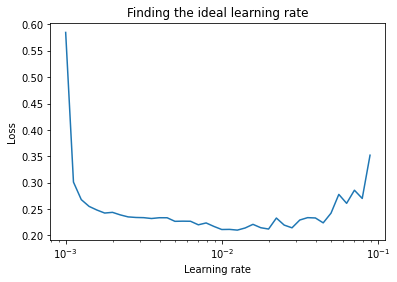

In [35]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/20
563/563 [==============================] - 2s 3ms/step - loss: 0.5848 - accuracy: 0.7441 - val_loss: 0.3382 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8758 - val_loss: 0.2972 - val_accuracy: 0.8767 - lr: 0.0011
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.8894 - val_loss: 0.2728 - val_accuracy: 0.8863 - lr: 0.0013
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.2551 - accuracy: 0.8932 - val_loss: 0.2644 - val_accuracy: 0.8893 - lr: 0.0014
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.8952 - val_loss: 0.2633 - val_accuracy: 0.8867 - lr: 0.0016
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.9004 - val_loss: 0.2584 - val_accuracy: 0.8917 - lr: 0.0018
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - lo

In [37]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [50]:
# Make predictions with the most recent model
y_probs = model_13.predict(test_data) # "probs" is short for probabilities

# See the predicted class number and label for the first example
y_probs[250].argmax(), cloth_classes[y_probs[250].argmax()]

(2, 'Pullover')

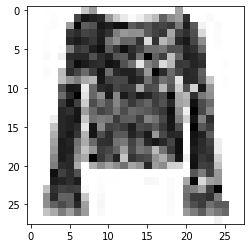

In [51]:
plt.imshow(test_data[250], cmap=plt.cm.binary)

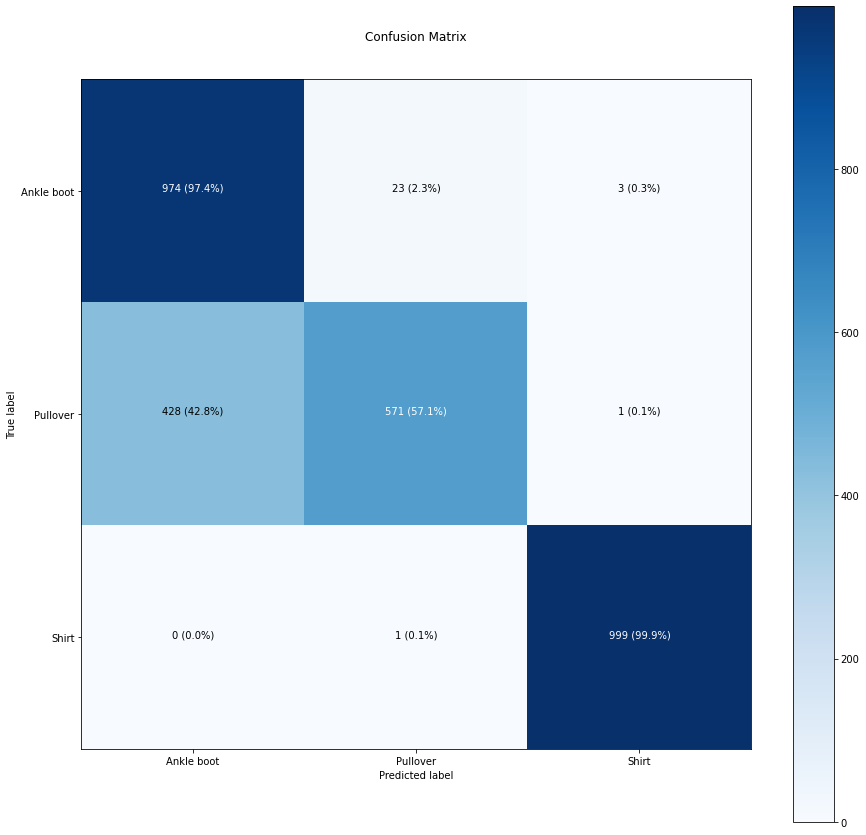

In [53]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=cloth_classes.values(),
                      figsize=(15, 15),
                      text_size=10)